In [1]:
from deconv.imports import *
from sklearn.utils import resample
import numpy as np
from deconv.figures.common import subplotLabel, getSetup

In [2]:
A_antiD, _, glycan_list = load_tables()
adcc_3a, adcc_3b = load_figures()

In [3]:
num_iters = 100

glycans_3a = []
glycans_3b = []

for i in range(num_iters):
    new3a = resample(adcc_3a, n_samples=40, replace=True, stratify=adcc_3a.index)
    mean_3a = new3a.groupby(level=0).sum() / new3a.groupby(level=0).count()

    new3b = resample(adcc_3b, n_samples=40, replace=True, stratify=adcc_3b.index)
    mean_3b = new3b.groupby(level=0).sum() / new3b.groupby(level=0).count()

    glycans_3a.append(infer_x(A_antiD, mean_3a))
    glycans_3b.append(infer_x(A_antiD, mean_3b))


In [4]:
glycans3a = np.array(glycans_3a)
mean3a = np.mean(glycans3a, axis=0)
error3a = np.std(glycans3a, axis=0)

glycans3b = np.array(glycans_3b)
mean3b = np.mean(glycans3b, axis=0)
error3b = np.std(glycans3b, axis=0)

print(error3a, error3b)



[0.00315623 0.00568358 0.         0.         0.00568319 0.00222399
 0.00481251 0.00655981 0.00081538 0.00281042 0.01936286 0.00230822
 0.01742988 0.08324665 0.0641785  0.05252603 0.18915005 0.29001959
 0.21817331 0.14187376 0.13399248 0.2703969  0.74829325 0.39504029] [0.00166995 0.         0.         0.00094042 0.02245662 0.01038309
 0.         0.         0.         0.         0.01573297 0.
 0.02052485 0.16292358 0.09384928 0.0938662  0.217698   0.36530161
 0.0022457  0.18279907 0.06676025 0.19223923 0.94034154 0.23426394]


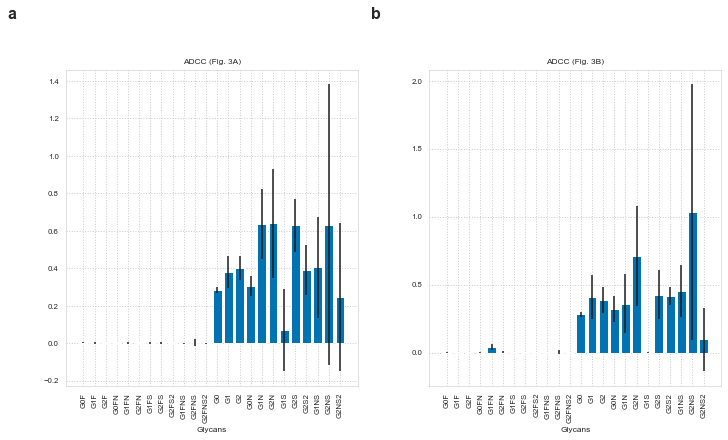

In [5]:
ax, f = getSetup((10, 6), (1, 2))
ax[0].bar(glycan_list, mean3a, yerr=error3a)
ax[0].set_title("ADCC (Fig. 3A)")
ax[0].set_xlabel("Glycans")
ax[0].set_xticklabels(glycan_list, rotation=90)

ax[1].bar(glycan_list, mean3b, yerr=error3b)
ax[1].set_title("ADCC (Fig. 3B)")
ax[1].set_xlabel("Glycans")
ax[1].set_xticklabels(glycan_list, rotation=90)

# Add subplot labels
subplotLabel(ax)

In [6]:
from deconv.figures.figure1 import makeFigure, makeFigureWithError

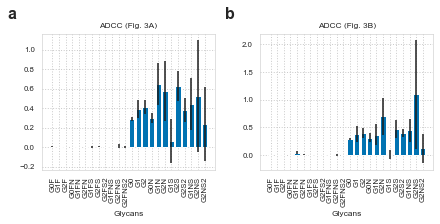

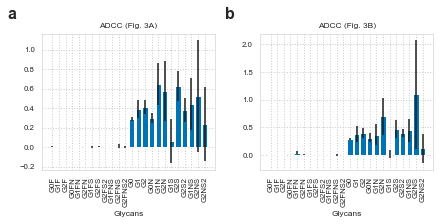

In [8]:
makeFigureWithError()

In [10]:
from sklearn.linear_model import LinearRegression as ols

In [13]:
A_antiD, _, glycan_list = load_tables()
adcc_3a, adcc_3b = load_figures()

mean_3a = (adcc_3a.groupby(level=0).sum()) / 4
mean_3b = (adcc_3b.groupby(level=0).sum()) / 4

model3a = ols().fit(A_antiD, mean_3a)
model3b = ols().fit(A_antiD, mean_3b)

In [14]:
glycans_3a = model3a.coef_
glycans_3b = model3b.coef_

In [28]:
#Errors 
var3a = np.var(model3a.predict(A_antiD) - mean_3a)
var3b = np.var(model3b.predict(A_antiD) - mean_3b)

error3a = np.sqrt(np.diag(var3a*np.linalg.inv(np.dot(np.transpose(A_antiD), A_antiD))))
error3b = np.sqrt(np.diag(var3b*np.linalg.inv(np.dot(np.transpose(A_antiD), A_antiD))))

#np.linalg.pinv(X) doesn't give me a square matrix so I used np.dot(np.transpose(A_antiD), A_antiD) instead
print(np.linalg.pinv(A_antiD).shape)
print(np.dot(np.transpose(A_antiD), A_antiD).shape)
print(error3a)


(24, 20)
(24, 24)
[3.42789493e-11 1.30557004e-09 7.45848229e-10 2.24393988e-10
 1.03110443e-09 2.65593455e-09 7.41701469e-08 2.29788900e-09
 1.52513111e-08 1.88795098e-08 7.62949072e-09 1.87041149e-08
 3.56352184e-11 2.76941199e-10            nan 3.01743972e-10
 2.18979520e-09 1.02142691e-08            nan            nan
            nan 6.51860230e-08 2.53124474e-08 9.76723052e-08]


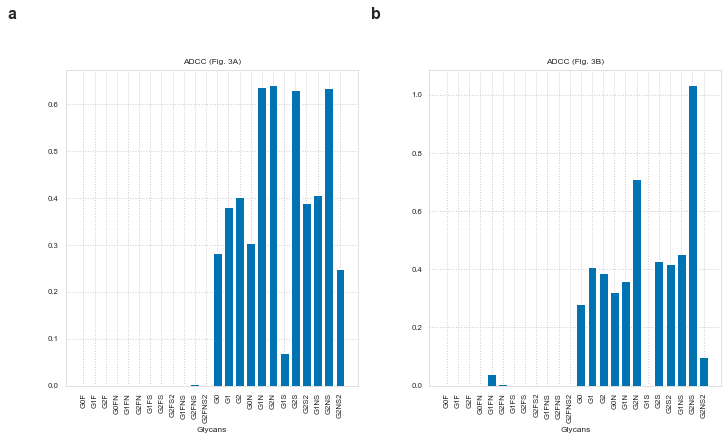

In [27]:
ax, f = getSetup((10, 6), (1, 2))
ax[0].bar(glycan_list, mean3a, yerr=error3a)
ax[0].set_title("ADCC (Fig. 3A)")
ax[0].set_xlabel("Glycans")
ax[0].set_xticklabels(glycan_list, rotation=90)

ax[1].bar(glycan_list, mean3b, yerr=error3b)
ax[1].set_title("ADCC (Fig. 3B)")
ax[1].set_xlabel("Glycans")
ax[1].set_xticklabels(glycan_list, rotation=90)

# Add subplot labels
subplotLabel(ax)